In [1]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
# get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine = create_engine(connection_string)
query = '''select t.type, t.operation, t.amount as t_amount, t.balance, t.k_symbol, l.amount as l_amount, l.duration, l.payments, l.status
from trans t
left join loan l
on t.account_id = l.account_id;'''

data = pd.read_sql_query(query, engine)
data.head()

,type,operation,t_amount,balance,k_symbol,l_amount,duration,payments,status
0,PRIJEM,VKLAD,700.0,700.0,,NaN,NaN,NaN,None
1,PRIJEM,VKLAD,900.0,900.0,,NaN,NaN,NaN,None
2,PRIJEM,VKLAD,1000.0,1000.0,,NaN,NaN,NaN,None
3,PRIJEM,VKLAD,600.0,600.0,,NaN,NaN,NaN,None
4,PRIJEM,VKLAD,400.0,400.0,,NaN,NaN,NaN,None


In [3]:
data.shape

(868019, 9)

In [4]:
# Activity 1
#  pd.read_sql_table will accept a table name and will retrieve the whole table. 
#  You can also read a whole table with pd.read_sql_query. Try it on the table 'district'.

#pd.read_sql_query("select * from bank.district", engine)

pd.read_sql_table("district", engine)







,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,north Moravia,182027,17,49,12,2,7,56.4,8746,3.33,3.74,90,4355,4433
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782,18347
74,75,Prerov,north Moravia,138032,67,30,4,2,5,64.6,8819,5.38,5.66,99,4063,4505
75,76,Sumperk,north Moravia,127369,31,32,13,2,7,51.2,8369,4.73,5.88,107,3736,2807


In [5]:
district = pd.read_sql_table('district', engine) # select * from district;
district.head()
type(district)

pandas.core.frame.DataFrame

In [6]:
district = pd.read_sql_query('select * from district', engine)
type(district)
# End Activity 

pandas.core.frame.DataFrame

In [8]:
data['status'].value_counts(dropna=False)

None    711938
C        72288
A        64599
B         9765
D         9429
Name: status, dtype: int64

In [9]:
data.shape

(868019, 9)

In [10]:
data.dtypes

type          object
operation     object
t_amount     float64
balance      float64
k_symbol      object
l_amount     float64
duration     float64
payments     float64
status        object
dtype: object

In [11]:
data.isna().sum()

type              0
operation         0
t_amount          0
balance           0
k_symbol          0
l_amount     711938
duration     711938
payments     711938
status       711938
dtype: int64

In [12]:
data = data[data['status'].isna()==False] # what rows are we dropping here?

In [13]:
data['k_symbol'].unique()

array(['', 'UROK', ' ', 'SIPO', 'SLUZBY', 'POJISTNE', 'UVER',
       'SANKC. UROK'], dtype=object)

In [15]:
pd.crosstab(data['duration'],data['k_symbol']).rename(columns={"":"emtpy"," ":"white"})

k_symbol,emtpy,white,POJISTNE,SANKC. UROK,SIPO,SLUZBY,UROK,UVER
duration,,,,,,,,
12.0,15875,1533,597,136,2160,4764,6349,803
24.0,16782,1169,461,142,2239,5119,6825,1404
36.0,13351,966,438,74,2059,4366,5568,1594
48.0,13678,987,364,105,1762,4465,6074,1830
60.0,14260,1324,552,132,2262,4878,6521,2113


In [16]:
data.groupby(['duration','k_symbol']).agg('count')

type  operation  t_amount  balance  l_amount  payments  \
duration k_symbol                                                               
12.0                  15875      15875     15875    15875     15875     15875   
                       1533       1533      1533     1533      1533      1533   
         POJISTNE       597        597       597      597       597       597   
         SANKC. UROK    136        136       136      136       136       136   
         SIPO          2160       2160      2160     2160      2160      2160   
         SLUZBY        4764       4764      4764     4764      4764      4764   
         UROK          6349       6349      6349     6349      6349      6349   
         UVER           803        803       803      803       803       803   
24.0                  16782      16782     16782    16782     16782     16782   
                       1169       1169      1169     1169      1169      1169   
         POJISTNE       461        461       461      461       461       461   
         SANKC. UROK    142        142       142      142       142       142   
         SIPO          2239       2239      2239     2239      2239      2239   
         SLUZBY        5119       5119      5119     5119      5119      5119   
         UROK          6825       6825      6825     6825      6825      6825   
         UVER          1404       1404      1404     1404      1404      1404   
36.0                  13351      13351     13351    13351     13351     13351   
                        966        966       966      966       966       966   
         POJISTNE       438        438       438      438       438       438   
         SANKC. UROK     74         74        74       74        74        74   
         SIPO          2059       2059      2059     2059      2059      2059   
         SLUZBY        4366       4366      4366     4366      4366      4366   
         UROK          5568       5568      5568     5568      5568      5568   
         UVER          1594       1594      1594     1594      1594      1594   
48.0                  13678      13678     13678    13678     13678     13678   
                        987        987       987      987       987       987   
         POJISTNE       364        364       364      364       364       364   
         SANKC. UROK    105        105       105      105       105       105   
         SIPO          1762       1762      1762     1762      1762      1762   
         SLUZBY        4465       4465      4465     4465      4465      4465   
         UROK          6074       6074      6074     6074      6074      6074   
         UVER          1830       1830      1830     1830      1830      1830   
60.0                  14260      14260     14260    14260     14260     14260   
                       1324       1324      1324     1324      1324      1324   
         POJISTNE       552        552       552      552       552       552   
         SANKC. UROK    132        132       132      132       132       132   
         SIPO          2262       2262      2262     2262      2262      2262   
         SLUZBY        4878       4878      4878     4878      4878      4878   
         UROK          6521       6521      6521     6521      6521      6521   
         UVER          2113       2113      2113     2113      2113      2113   

                      status  
duration k_symbol             
12.0                   15875  
                        1533  
         POJISTNE        597  
         SANKC. UROK     136  
         SIPO           2160  
         SLUZBY         4764  
         UROK           6349  
         UVER            803  
24.0                   16782  
                        1169  
         POJISTNE        461  
         SANKC. UROK     142  
         SIPO           2239  
         SLUZBY         5119  
         UROK           6825  
         UVER           1404  
36.0                   13351  
                         966  


In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
t_amount,156081.0,7795.357503,11707.393031,0.0,144.1,2800.0,9902.0,87300.0
balance,156081.0,45353.630156,25028.806295,-19310.0,27291.7,40649.5,59162.0,209637.0
l_amount,156081.0,146822.230995,109974.568837,4980.0,65184.0,111384.0,203940.0,590820.0
duration,156081.0,35.598209,17.189519,12.0,24.0,36.0,48.0,60.0
payments,156081.0,4189.309205,2198.565442,304.0,2482.0,3900.0,5900.0,9910.0


In [18]:
data['duration'] = data['duration'].astype('object') # This will be treated as categorical

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
t_amount,156081.0,7795.357503,11707.393031,0.0,144.1,2800.0,9902.0,87300.0
balance,156081.0,45353.630156,25028.806295,-19310.0,27291.7,40649.5,59162.0,209637.0
l_amount,156081.0,146822.230995,109974.568837,4980.0,65184.0,111384.0,203940.0,590820.0
payments,156081.0,4189.309205,2198.565442,304.0,2482.0,3900.0,5900.0,9910.0


In [20]:
data['duration'].value_counts()

24.0    34141
12.0    32217
60.0    32042
48.0    29265
36.0    28416
Name: duration, dtype: int64

In [21]:
data.isna().sum()

type         0
operation    0
t_amount     0
balance      0
k_symbol     0
l_amount     0
duration     0
payments     0
status       0
dtype: int64

In [22]:
data['operation'].value_counts()

VYBER             70189
                  31337
PREVOD NA UCET    25796
VKLAD             22633
PREVOD Z UCTU      5336
VYBER KARTOU        790
Name: operation, dtype: int64

In [23]:
def cleanOperation(x): 
    x = x.lower()
    if 'vyber' in x:
        return "vyber"
    elif 'prevod' in x:
        return "prevod"
    elif 'vklad' in x:
        return 'vklad'
    else:
        return 'unknown'

# data['operation'] = data['operation'].apply(cleanOperation)    
data['operation'] = list(map(cleanOperation, data['operation']))

In [24]:
data['operation'].value_counts()

vyber      70979
unknown    31337
prevod     31132
vklad      22633
Name: operation, dtype: int64

In [25]:
data['k_symbol'].value_counts()

               73946
UROK           31337
SLUZBY         23592
SIPO           10482
UVER            7744
                5979
POJISTNE        2412
SANKC. UROK      589
Name: k_symbol, dtype: int64

In [26]:
data['k_symbol'].unique()

array(['', 'UROK', ' ', 'SIPO', 'SLUZBY', 'POJISTNE', 'UVER',
       'SANKC. UROK'], dtype=object)

In [27]:
data['k_symbol'].value_counts().index

Index(['', 'UROK', 'SLUZBY', 'SIPO', 'UVER', ' ', 'POJISTNE', 'SANKC. UROK'], dtype='object')

In [28]:
def cleankSymbol(x):
    if x in ['', ' ']:
        return 'unknown'
    else:
        return x

data['k_symbol'] = list(map(cleankSymbol, data['k_symbol']))

In [29]:
data['k_symbol'].value_counts()

unknown        79925
UROK           31337
SLUZBY         23592
SIPO           10482
UVER            7744
POJISTNE        2412
SANKC. UROK      589
Name: k_symbol, dtype: int64

In [30]:
data = data[~data['k_symbol'].isin(['POJISTNE', 'SANKC. UROK', 'UVER'])] # ~ : NOT

In [31]:
data['k_symbol'].isin(['POJISTNE', 'SANKC. UROK', 'UVER'])

62        False
63        False
69        False
75        False
96        False
          ...  
867954    False
867981    False
867986    False
867997    False
868011    False
Name: k_symbol, Length: 145336, dtype: bool

In [ ]:
# discuss disadvantages and alternatives to dropping rows

In [32]:
data['type'].value_counts()

VYDAJ     80683
PRIJEM    59306
VYBER      5347
Name: type, dtype: int64

In [33]:
# Activity 2:
# Explore values in columns TYPE and OPERATION. 
# How many different combinations of each type and operation are there? 
# How many rows for each combination? 
# (You may want to check out pandas.crosstab function.)
pd.crosstab(data['type'],data['operation'])



operation,prevod,unknown,vklad,vyber
type,,,,
PRIJEM,5336,31337,22633,0
VYBER,0,0,0,5347
VYDAJ,15640,0,0,65043


In [38]:
data.type.value_counts()

VYDAJ     80683
PRIJEM    59306
VYBER      5347
Name: type, dtype: int64

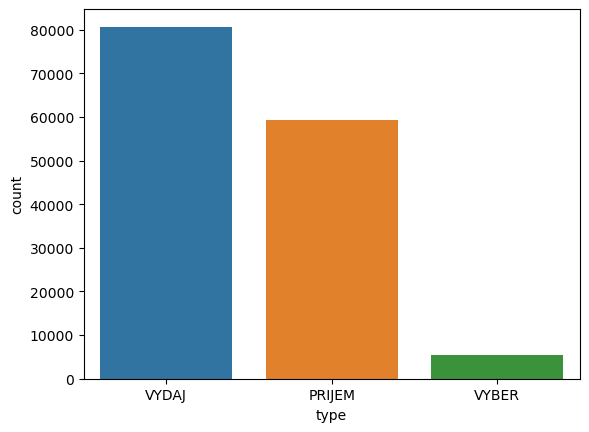

In [40]:
import seaborn as sns
%matplotlib inline
sns.countplot(x=data.type, order=list(data.type.value_counts().index));

In [41]:
data.operation.value_counts()

vyber      70390
unknown    31337
vklad      22633
prevod     20976
Name: operation, dtype: int64

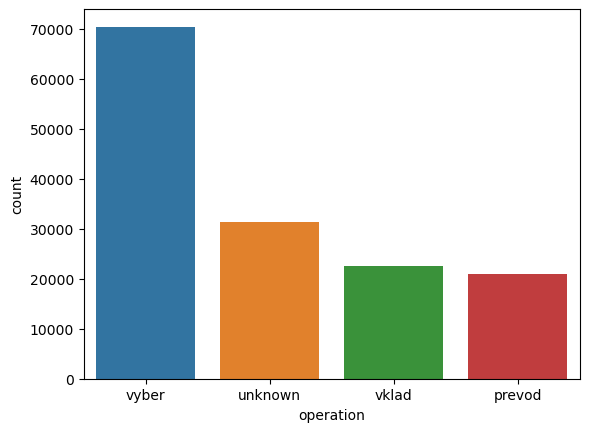

In [42]:
sns.countplot(x=data.operation, order=list(data.operation.value_counts().index) );

In [43]:
pd.crosstab(data.type, data.operation)

operation,prevod,unknown,vklad,vyber
type,,,,
PRIJEM,5336,31337,22633,0
VYBER,0,0,0,5347
VYDAJ,15640,0,0,65043


In [ ]:
#End Activity 2

In [44]:
import matplotlib.pyplot as plt

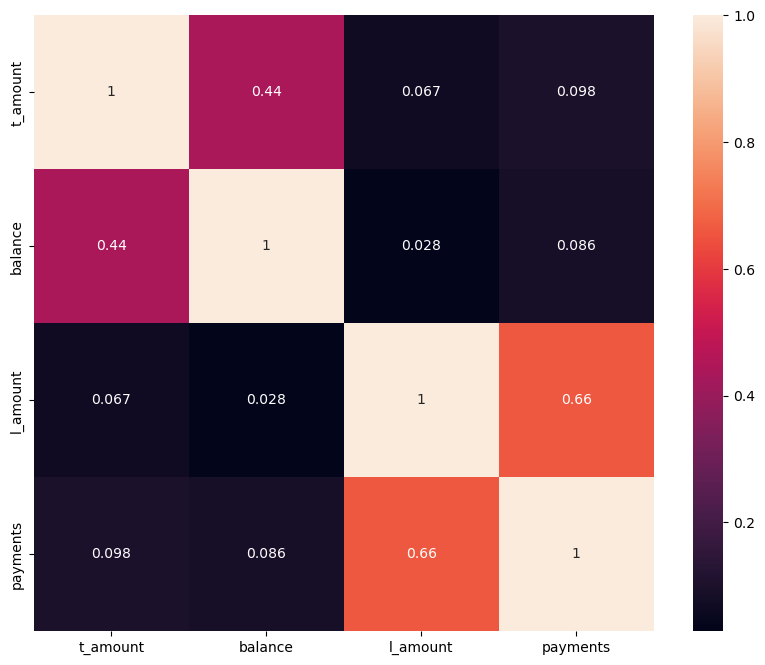

In [45]:
# look for multicolinearity (some columns having almost identical correlation to other variables)
# why can't we look for correlation with our target variable (status)?
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [46]:
import numpy as np

def plot_distributions(df):
    numerical_columns = df.select_dtypes(np.number)
    for col in numerical_columns:
        sns.displot(df[col])
        plt.show()

#plot_distributions(data)
#sns.displot(data['l_amount'])
#plt.show()

#sns.displot(data['balance'])
#plt.show()

#sns.displot(data['payments'])
#plt.show()

In [47]:
# Need to X-y split and train-test-split BEFORE I apply transformations, 
# then train transformation on training set only
y = data['status']
X = data.drop('status', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [48]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer

X_train_normalized = transformer.transform(X_train_num)
X_test_normalized  = transformer.transform(X_test_num)

X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_test_norm  = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)

In [50]:
X_train_norm.describe()

,t_amount,balance,l_amount,payments
count,116268.000000,116268.000000,116268.000000,116268.000000
mean,0.092856,0.283540,0.240736,0.405491
std,0.137858,0.109784,0.187205,0.228776
min,0.000000,0.000000,0.000000,0.000000
25%,0.001524,0.204208,0.102765,0.227462
50%,0.031088,0.262055,0.180520,0.374349
75%,0.125604,0.343356,0.334556,0.582761
max,1.000000,1.000000,1.000000,1.000000


In [51]:
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,t_amount,balance,l_amount,payments
0,0.002688,0.366028,0.138058,0.117323
1,0.002611,0.334904,0.314625,0.296794
2,0.459416,0.411760,0.295002,0.482511
3,0.251718,0.187055,0.470197,0.454924
4,0.000167,0.357972,0.151884,0.131376


In [52]:
X_train_categorical = X_train.select_dtypes('object')
X_test_categorical  = X_test.select_dtypes('object')

from sklearn.preprocessing import OneHotEncoder

#categories_values = [list(data[col].unique()) for col in X_train_categorical.columns]
encoder = OneHotEncoder(drop='first')
encoder.fit(X_train_categorical)

X_train_cat_np = encoder.transform(X_train_categorical).toarray()
X_test_cat_np  = encoder.transform(X_test_categorical).toarray()

X_train_cat = pd.DataFrame(X_train_cat_np, columns=encoder.get_feature_names_out())
X_test_cat  = pd.DataFrame(X_test_cat_np,  columns=encoder.get_feature_names_out())

#X_train_cat = pd.get_dummies(X_train_categorical, 
#                             columns=['type', 'operation', 'k_symbol', 'duration'],
#                             drop_first=True)
#X_test_cat = pd.get_dummies(X_test_categorical, 
#                             columns=['type', 'operation', 'k_symbol', 'duration'],
#                             drop_first=True)

X_train_cat.head()

,type_VYBER,type_VYDAJ,operation_unknown,operation_vklad,operation_vyber,k_symbol_SLUZBY,k_symbol_UROK,k_symbol_unknown,duration_24.0,duration_36.0,duration_48.0,duration_60.0
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Activity 3
# Explore visually the transformed numerical columns. What do you see?
# Another typical transformation for numerical columns is to take the logarithm. 
# Apply the log transform to columns balance and t_ammount and compare the results with the scaled data.

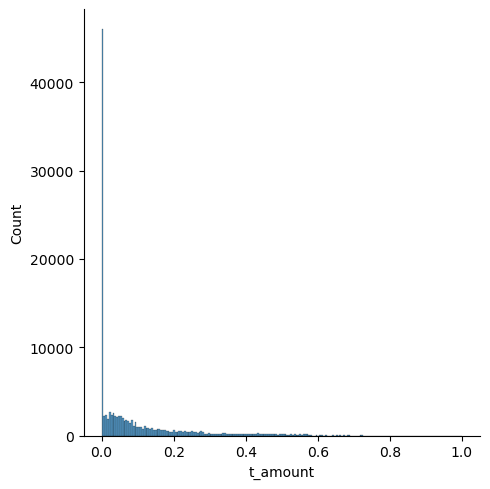

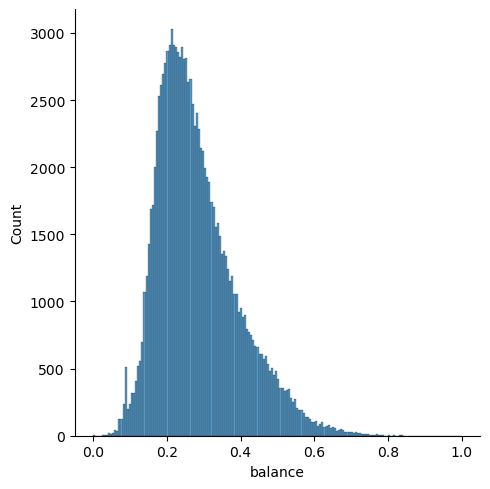

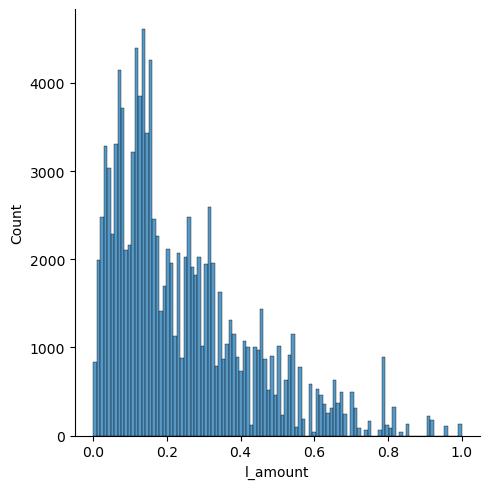

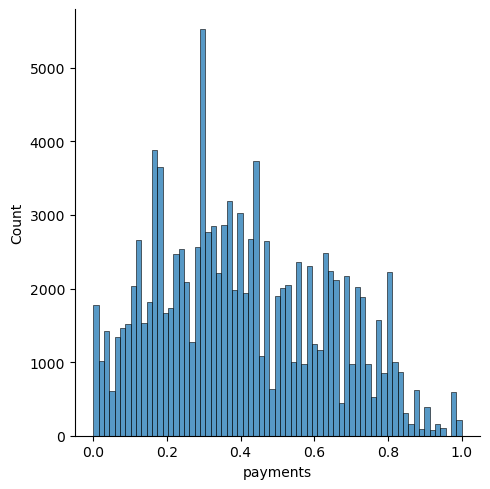

In [53]:
plot_distributions(X_train_norm)

#sns.displot(X_train_norm['t_amount'])
#plt.show()

#sns.displot(X_train_norm['l_amount'])
#plt.show()

#sns.displot(X_train_norm['balance'])
#plt.show()

#sns.displot(X_train_norm['payments'])
#plt.show()

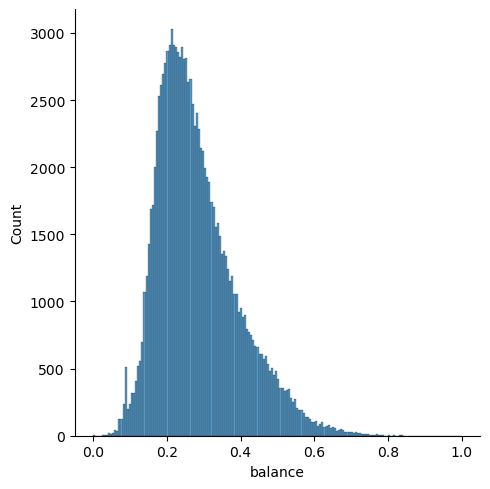

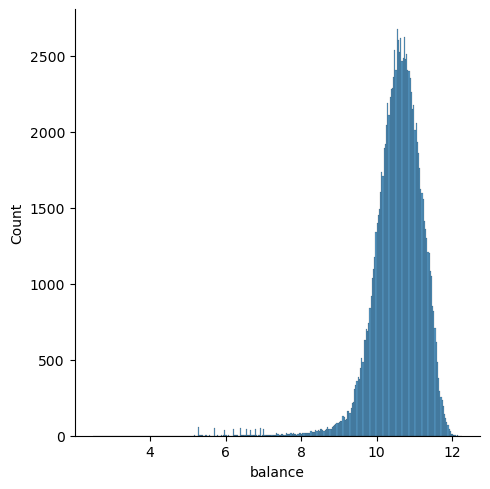

In [54]:
sns.displot(X_train_norm['balance']) # normalized
sns.displot(X_train_num['balance'].apply(lambda x:np.log(x))) # divide by twelve to get a 0-1 scale
plt.show()


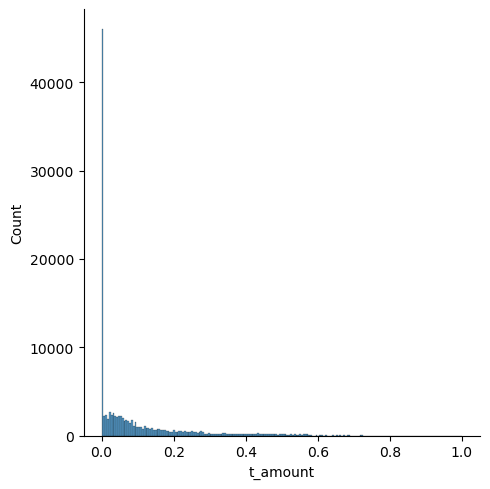

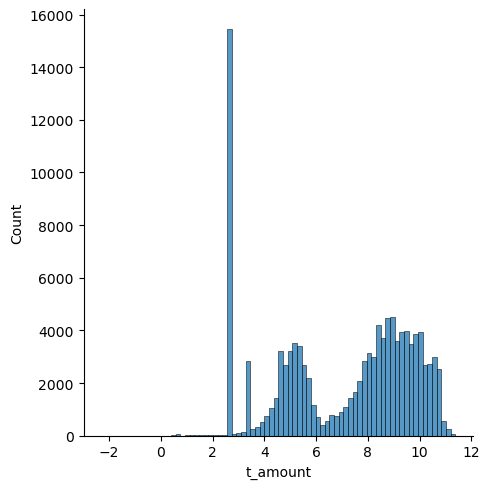

In [55]:
sns.displot(X_train_norm['t_amount']) # normalized
sns.displot(X_train_num['t_amount'].apply(lambda x:np.log(x) if x>0 else x)) # /12? (log transformed)
plt.show()

In [ ]:
# End Activity 3

In [56]:
# build X_train and y_train
# remember: y = data['status'], y_train selected in train_test_split
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)

In [58]:
X_train_transformed

array([[0.00268843, 0.36602807, 0.13805817, ..., 0.        , 0.        ,
        1.        ],
       [0.00261054, 0.33490426, 0.31462515, ..., 0.        , 0.        ,
        1.        ],
       [0.45941581, 0.41176015, 0.29500205, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.26453608, 0.357496  , 0.22017616, ..., 0.        , 1.        ,
        0.        ],
       [0.56908362, 0.49639448, 0.28818107, ..., 0.        , 0.        ,
        0.        ],
       [0.36540664, 0.34817359, 0.10776321, ..., 0.        , 0.        ,
        0.        ]])

lbfgs:

- Sets the coefficients of the linear model at random values
- It selects one coefficient, and then it mofies it slightly b_{i,new} = b_{i,old} + small_change
- It computes the new cost function
- Compares the new cost function with the old one.
If the change reduces the cost function, it keeps the new value of the coefficient
Otherwise the change is discarded.

In [59]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial')

classification.fit(X_train_transformed, y_train)

/Users/ignacio/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=0)

In [60]:
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial')

classification.fit(X_train_transformed, y_train)

LogisticRegression(multi_class='multinomial', random_state=0, solver='saga')

In [ ]:
# Can we now make predictions on the X_test?
# predictions = classification.predict(X_test)
# classification.score(X_test, y_test)


# NO - need to perform transformations on the X_test as well

In [61]:
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)

In [ ]:
#.append()
#function()

In [62]:
# Now we can make predictions on the test set:
y_test_pred = classification.predict(X_test_transformed)
print(y_test_pred)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_test_pred))
classification.score(X_test_transformed, y_test) # Accuracy for classification models and R2 for regression mnodels

['C' 'C' 'A' ... 'C' 'A' 'A']
0.7034883720930233


0.7034883720930233

In [63]:
print(y_test.value_counts())
# As you would notice here, there is a huge imbalance in the data among the different classes. 
# We will talk more about imbalance and how to resolve it later (tomorrow)


C    13254
A    12245
B     1804
D     1765
Name: status, dtype: int64


/Users/ignacio/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


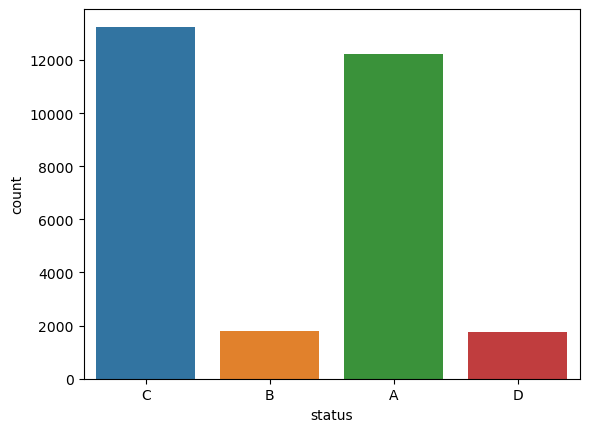

In [64]:
sns.countplot(y_test)
plt.show()

In [65]:
pd.Series(y_test_pred).value_counts()
# This shows that the disparity in the numbers are amplified by the model

C    16111
A    12653
B      257
D       47
dtype: int64

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_test_pred)

array([[ 9184,    50,  3011,     0],
       [ 1056,   160,   588,     0],
       [ 2162,     8, 11071,    13],
       [  251,    39,  1441,    34]])

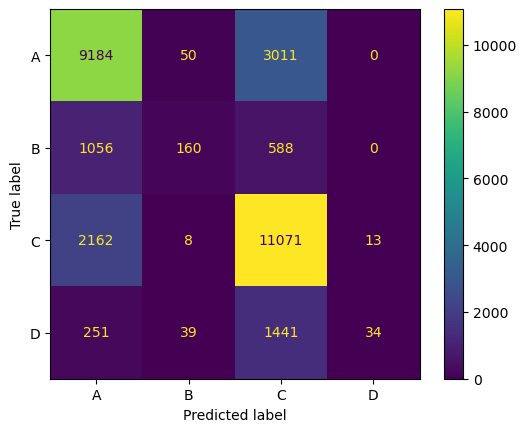

In [67]:
cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_)
disp.plot()
plt.show()

In [68]:
# predicted | A | B | C | D |
# --------------------------
# actual  A | + |  |   |   |
# --------------------------
#         B |   | + |   |   |
# --------------------------
#         C |   |   | + |   |
# --------------------------
#         D |   |   |   | + |

In [69]:
from sklearn.metrics import cohen_kappa_score

In [70]:
cohen_kappa_score(y_test, y_test_pred)

0.47358511077182464

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           A       0.73      0.75      0.74     12245
           B       0.62      0.09      0.16      1804
           C       0.69      0.84      0.75     13254
           D       0.72      0.02      0.04      1765

    accuracy                           0.70     29068
   macro avg       0.69      0.42      0.42     29068
weighted avg       0.70      0.70      0.67     29068



In [ ]:
# real         | A  | B |  C  | D |
# ----------------------------------
# predicted  A | AA | AB| AC | AD |  Precission(A) = AA/(AA+AB+AC+AD)
# ---------------------------------
#            B | BA | BB | BC | BD | Precission(B) = BB/(BA+BB+BC+BD)
# --------------------------------
#           C |  CA |  CB | CC | CD |
# --------------------------------
#           D | DA  | DB  | DC  | DD |

In [ ]:
# real         | A  | B |  C  | D |
# ----------------------------------
# predicted  A | AA | AB| AC | AD |  Recall(A) = AA/(AA+BA+CA+DA)
# ---------------------------------
#            B | BA | BB | BC | BD | Recall(B) = BB/(AB+BB+CB+DB)
# --------------------------------
#           C |  CA |  CB | CC | CD |
# --------------------------------
#           D | DA | DB  | DC  | DD |

-Get data
-Clean data
-Explore data (plot distributions, count plots,..)
-X-y split
-Train-Test split
-Fit trainsformers/scalers train set
-Transform train and test set
-Fit model/models
-Evaluate your models

Data Analyst/BA:
-Get data
-Clean data
-Explore data (plot distributions, count plots,..)
-Explain data (with dashboards)

Data Scientist:
-Get data
-Clean data
-Explore data (plot distributions, count plots,..)
-X-y split
-Train-Test split
-Fit trainsformers/scalers train set
-Transform train and test set
-Fit model/models
-Evaluate your models 
It tries to generate the best possible models

Data Engineer:
-Set ups all the insfraestructure to run and mantain the models
-Create the MySQL database
-Set up virtual machine to run the models
-Update the models